In [1]:
import sys
sys.path.append('/g/g92/miao1/Development/llsmvis')
sys.path.append('/Users/yi10/Desktop/Research/Software/T-llsmvis/')
sys.path.append('/g/g92/yi10')
import llsmvis
from llsmvis.extensions import hp3d
from llsmvis.extensions.hp3d import surface_morphometrics
import os
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import copy

Loading BokehJS ...

In [2]:
# ticket information (the output files from the interactive trimming results, see E1 for details)
tpath='/p/lscratchh/yi10/hp3d/CroppingData'
thead='2021-10-29-cell3'  
tlist=hp3d.croproi3d.get_trimmed_tiff_list(tpath, thead)


In [3]:
# h5fname='/p/lscratchh/yi10/hp3d/2021-10-29-cell3/hp3ddata_2021-10-29-cell3.hdf5'

hp3ddata_path='/p/lscratchh/yi10/hp3d/'+thead
d=hp3d.hp3ddata.HP3Ddata(fpath=hp3ddata_path,dfnamehead='hp3ddata_'+thead,initialize=False,verbose=False)


In [4]:
d.show_data_structure()


[D10] volume values
[D11] surface area values
[D12] sphere radius with equi volume
[D13] sphere radius with equi surface area
[D14] polarity vector amplitudes
[D15] polarity based on volume - negative volume std
[D16] polarity based on volume - positive volume std
[D17] polarity based on volume - sum of negative delta volumes
[D18] polarity based on volume - sum of positive delta volumes
[D19] polarity based on roughness - maxima N
[D1] mass centers
[D20] polarity based on roughness - minima N
[D2] threshold saddle point
[D3] threshold saddle point index
[D4] threshold upper bound
[D5] threshold upper bound index
[D6] threshold lower bound
[D7] threshold lower bound index
[D8] threshold cell peripheral lower bound
[D9] volume centers
[G01] voxel value bin centers
[G02] voxel value histogram counts
[G03] stack XY mips before cropping
[G04] stack YZ mips before cropping
[G05] stack XZ mips before cropping
[G06] stack XY mips after cropping - saddle point to upper bound
[G07] stack YZ mip

0

In [5]:
lginds=[np.nan]*50
lgs=[0]*50


In [6]:
lgs[0]=1458
lgs[10]=1270
lgs[20]=1070
lgs[30]=860
lgs[35]=786
lgs[45]=700
lgs[49]=658
lgs[1:10]=np.linspace(lgs[0],lgs[10],9)
lgs[11:20]=np.linspace(lgs[10],lgs[20],9)
lgs[21:30]=np.linspace(lgs[20],lgs[30],9)
lgs[31:35]=np.linspace(lgs[30],lgs[35],4)
lgs[36:45]=np.linspace(lgs[35],lgs[45],9)
lgs[46:49]=np.linspace(lgs[45],lgs[49],3)


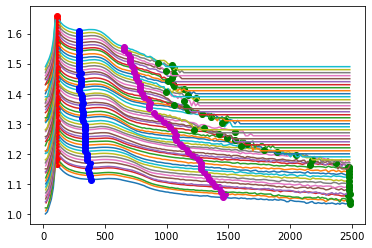

In [7]:
for tind in np.arange(50):
    hs=np.asarray(d.h5f['[G02] voxel value histogram counts/T'+str(tind)])
    lbind=np.int(d.h5f['[D7] threshold lower bound index'][tind])
    spind=np.int(d.h5f['[D3] threshold saddle point index'][tind])
    ubind=np.int(d.h5f['[D5] threshold upper bound index'][tind])
    bc=np.asarray(d.h5f['[G01] voxel value bin centers/T'+str(tind)])
    plt.plot(bc,(hs+1)**0.01+tind*0.01)
    lgind=np.where(bc>=lgs[tind])[0][0]
    plt.plot(bc[lbind], (hs[lbind]+1)**0.01+tind*0.01,'ro')
    plt.plot(bc[spind], (hs[spind]+1)**0.01+tind*0.01,'bo')
    plt.plot(bc[ubind], (hs[ubind]+1)**0.01+tind*0.01,'go')
    plt.plot(bc[lgind], (hs[lgind]+1)**0.01+tind*0.01,'mo')

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0000_3nm_0000000msec_0260029666msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0000_3nm_0000000msec_0260029666msecAbs.tif
create binary mask with threshold 1458.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0000_3nm_0000000msec_0260029666msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0000_3nm_0000000msec_0260029666msecAbs.tif
create binary mask with threshold [386.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0001_3nm_0031044msec_0260060710msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0001_3nm_0031044msec_0260060710msecAbs.tif
create binary mask with threshold 1469.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0001_3nm_0031044msec_0260060710msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0001_3nm_0031044msec_0260060710msecAbs.tif
create binary mask with threshold [377.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operatio

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0002_3nm_0062128msec_0260091794msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0002_3nm_0062128msec_0260091794msecAbs.tif
create binary mask with threshold 1442.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0002_3nm_0062128msec_0260091794msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0002_3nm_0062128msec_0260091794msecAbs.tif
create binary mask with threshold [370.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0003_3nm_0093192msec_0260122858msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0003_3nm_0093192msec_0260122858msecAbs.tif
create binary mask with threshold 1427.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0003_3nm_0093192msec_0260122858msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0003_3nm_0093192msec_0260122858msecAbs.tif
create binary mask with threshold [361.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0004_3nm_0124298msec_0260153964msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0004_3nm_0124298msec_0260153964msecAbs.tif
create binary mask with threshold 1394.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0004_3nm_0124298msec_0260153964msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0004_3nm_0124298msec_0260153964msecAbs.tif
create binary mask with threshold [370.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0005_3nm_0155401msec_0260185067msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0005_3nm_0155401msec_0260185067msecAbs.tif
create binary mask with threshold 1364.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0005_3nm_0155401msec_0260185067msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0005_3nm_0155401msec_0260185067msecAbs.tif
create binary mask with threshold [377.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operatio

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0006_3nm_0186502msec_0260216168msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0006_3nm_0186502msec_0260216168msecAbs.tif
create binary mask with threshold 1343.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0006_3nm_0186502msec_0260216168msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0006_3nm_0186502msec_0260216168msecAbs.tif
create binary mask with threshold [356.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operatio

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0007_3nm_0217616msec_0260247282msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0007_3nm_0217616msec_0260247282msecAbs.tif
create binary mask with threshold 1322.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0007_3nm_0217616msec_0260247282msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0007_3nm_0217616msec_0260247282msecAbs.tif
create binary mask with threshold [356.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operatio

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0008_3nm_0248721msec_0260278387msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0008_3nm_0248721msec_0260278387msecAbs.tif
create binary mask with threshold 1301.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0008_3nm_0248721msec_0260278387msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0008_3nm_0248721msec_0260278387msecAbs.tif
create binary mask with threshold [356.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operatio

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0009_3nm_0279832msec_0260309498msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0009_3nm_0279832msec_0260309498msecAbs.tif
create binary mask with threshold 1280.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0009_3nm_0279832msec_0260309498msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0009_3nm_0279832msec_0260309498msecAbs.tif
create binary mask with threshold [335.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operatio

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0010_3nm_0310942msec_0260340608msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0010_3nm_0310942msec_0260340608msecAbs.tif
create binary mask with threshold 1280.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0010_3nm_0310942msec_0260340608msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0010_3nm_0310942msec_0260340608msecAbs.tif
create binary mask with threshold [335.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operatio

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0011_3nm_0342070msec_0260371736msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0011_3nm_0342070msec_0260371736msecAbs.tif
create binary mask with threshold 1280.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0011_3nm_0342070msec_0260371736msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0011_3nm_0342070msec_0260371736msecAbs.tif
create binary mask with threshold [335.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operatio

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0012_3nm_0373191msec_0260402857msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0012_3nm_0373191msec_0260402857msecAbs.tif
create binary mask with threshold 1259.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0012_3nm_0373191msec_0260402857msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0012_3nm_0373191msec_0260402857msecAbs.tif
create binary mask with threshold [335.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operatio

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0013_3nm_0404315msec_0260433981msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0013_3nm_0404315msec_0260433981msecAbs.tif
create binary mask with threshold 1238.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0013_3nm_0404315msec_0260433981msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0013_3nm_0404315msec_0260433981msecAbs.tif
create binary mask with threshold [335.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operatio

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0014_3nm_0435447msec_0260465113msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0014_3nm_0435447msec_0260465113msecAbs.tif
create binary mask with threshold 1202.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0014_3nm_0435447msec_0260465113msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0014_3nm_0435447msec_0260465113msecAbs.tif
create binary mask with threshold [338.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0015_3nm_0466556msec_0260496222msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0015_3nm_0466556msec_0260496222msecAbs.tif
create binary mask with threshold 1170.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0015_3nm_0466556msec_0260496222msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0015_3nm_0466556msec_0260496222msecAbs.tif
create binary mask with threshold [338.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0016_3nm_0497675msec_0260527341msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0016_3nm_0497675msec_0260527341msecAbs.tif
create binary mask with threshold 1154.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0016_3nm_0497675msec_0260527341msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0016_3nm_0497675msec_0260527341msecAbs.tif
create binary mask with threshold [335.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operatio

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0017_3nm_0528762msec_0260558428msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0017_3nm_0528762msec_0260558428msecAbs.tif
create binary mask with threshold 1122.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0017_3nm_0528762msec_0260558428msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0017_3nm_0528762msec_0260558428msecAbs.tif
create binary mask with threshold [338.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0018_3nm_0559873msec_0260589539msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0018_3nm_0559873msec_0260589539msecAbs.tif
create binary mask with threshold 1106.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0018_3nm_0559873msec_0260589539msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0018_3nm_0559873msec_0260589539msecAbs.tif
create binary mask with threshold [338.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0019_3nm_0590998msec_0260620664msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0019_3nm_0590998msec_0260620664msecAbs.tif
create binary mask with threshold 1074.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0019_3nm_0590998msec_0260620664msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0019_3nm_0590998msec_0260620664msecAbs.tif
create binary mask with threshold [322.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

/g/g92/yi10/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0020_3nm_0622109msec_0260651775msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0020_3nm_0622109msec_0260651775msecAbs.tif
create binary mask with threshold 1070.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0020_3nm_0622109msec_0260651775msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0020_3nm_0622109msec_0260651775msecAbs.tif
create binary mask with threshold [314.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operatio

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0021_3nm_0653241msec_0260682907msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0021_3nm_0653241msec_0260682907msecAbs.tif
create binary mask with threshold 1074.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0021_3nm_0653241msec_0260682907msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0021_3nm_0653241msec_0260682907msecAbs.tif
create binary mask with threshold [322.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0022_3nm_0684376msec_0260714042msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0022_3nm_0684376msec_0260714042msecAbs.tif
create binary mask with threshold 1058.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0022_3nm_0684376msec_0260714042msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0022_3nm_0684376msec_0260714042msecAbs.tif
create binary mask with threshold [322.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0023_3nm_0715496msec_0260745162msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0023_3nm_0715496msec_0260745162msecAbs.tif
create binary mask with threshold 1028.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0023_3nm_0715496msec_0260745162msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0023_3nm_0715496msec_0260745162msecAbs.tif
create binary mask with threshold [314.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operatio

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0024_3nm_0746606msec_0260776272msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0024_3nm_0746606msec_0260776272msecAbs.tif
create binary mask with threshold 1007.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0024_3nm_0746606msec_0260776272msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0024_3nm_0746606msec_0260776272msecAbs.tif
create binary mask with threshold [314.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operatio

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0025_3nm_0777718msec_0260807384msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0025_3nm_0777718msec_0260807384msecAbs.tif
create binary mask with threshold 978.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0025_3nm_0777718msec_0260807384msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0025_3nm_0777718msec_0260807384msecAbs.tif
create binary mask with threshold [322.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0026_3nm_0808855msec_0260838521msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0026_3nm_0808855msec_0260838521msecAbs.tif
create binary mask with threshold 944.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0026_3nm_0808855msec_0260838521msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0026_3nm_0808855msec_0260838521msecAbs.tif
create binary mask with threshold [314.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0027_3nm_0839985msec_0260869651msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0027_3nm_0839985msec_0260869651msecAbs.tif
create binary mask with threshold 923.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0027_3nm_0839985msec_0260869651msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0027_3nm_0839985msec_0260869651msecAbs.tif
create binary mask with threshold [314.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0028_3nm_0871094msec_0260900760msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0028_3nm_0871094msec_0260900760msecAbs.tif
create binary mask with threshold 898.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0028_3nm_0871094msec_0260900760msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0028_3nm_0871094msec_0260900760msecAbs.tif
create binary mask with threshold [306.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0029_3nm_0902210msec_0260931876msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0029_3nm_0902210msec_0260931876msecAbs.tif
create binary mask with threshold 860.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0029_3nm_0902210msec_0260931876msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0029_3nm_0902210msec_0260931876msecAbs.tif
create binary mask with threshold [293.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0030_3nm_0933347msec_0260963013msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0030_3nm_0933347msec_0260963013msecAbs.tif
create binary mask with threshold 860.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0030_3nm_0933347msec_0260963013msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0030_3nm_0933347msec_0260963013msecAbs.tif
create binary mask with threshold [293.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0031_3nm_0964457msec_0260994123msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0031_3nm_0964457msec_0260994123msecAbs.tif
create binary mask with threshold 866.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0031_3nm_0964457msec_0260994123msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0031_3nm_0964457msec_0260994123msecAbs.tif
create binary mask with threshold [306.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0032_3nm_0995567msec_0261025233msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0032_3nm_0995567msec_0261025233msecAbs.tif
create binary mask with threshold 850.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0032_3nm_0995567msec_0261025233msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0032_3nm_0995567msec_0261025233msecAbs.tif
create binary mask with threshold [306.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0033_3nm_1026706msec_0261056372msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0033_3nm_1026706msec_0261056372msecAbs.tif
create binary mask with threshold 818.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0033_3nm_1026706msec_0261056372msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0033_3nm_1026706msec_0261056372msecAbs.tif
create binary mask with threshold [306.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0034_3nm_1057839msec_0261087505msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0034_3nm_1057839msec_0261087505msecAbs.tif
create binary mask with threshold 797.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0034_3nm_1057839msec_0261087505msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0034_3nm_1057839msec_0261087505msecAbs.tif
create binary mask with threshold [293.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0035_3nm_1088958msec_0261118624msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0035_3nm_1088958msec_0261118624msecAbs.tif
create binary mask with threshold 786.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0035_3nm_1088958msec_0261118624msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0035_3nm_1088958msec_0261118624msecAbs.tif
create binary mask with threshold [306.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0036_3nm_1120095msec_0261149761msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0036_3nm_1120095msec_0261149761msecAbs.tif
create binary mask with threshold 786.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0036_3nm_1120095msec_0261149761msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0036_3nm_1120095msec_0261149761msecAbs.tif
create binary mask with threshold [290.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0037_3nm_1151228msec_0261180894msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0037_3nm_1151228msec_0261180894msecAbs.tif
create binary mask with threshold 786.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0037_3nm_1151228msec_0261180894msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0037_3nm_1151228msec_0261180894msecAbs.tif
create binary mask with threshold [290.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0038_3nm_1182333msec_0261211999msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0038_3nm_1182333msec_0261211999msecAbs.tif
create binary mask with threshold 770.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0038_3nm_1182333msec_0261211999msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0038_3nm_1182333msec_0261211999msecAbs.tif
create binary mask with threshold [290.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0039_3nm_1213485msec_0261243151msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0039_3nm_1213485msec_0261243151msecAbs.tif
create binary mask with threshold 754.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0039_3nm_1213485msec_0261243151msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0039_3nm_1213485msec_0261243151msecAbs.tif
create binary mask with threshold [290.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0040_3nm_1244612msec_0261274278msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0040_3nm_1244612msec_0261274278msecAbs.tif
create binary mask with threshold 754.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0040_3nm_1244612msec_0261274278msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0040_3nm_1244612msec_0261274278msecAbs.tif
create binary mask with threshold [290.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0041_3nm_1275767msec_0261305433msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0041_3nm_1275767msec_0261305433msecAbs.tif
create binary mask with threshold 738.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0041_3nm_1275767msec_0261305433msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0041_3nm_1275767msec_0261305433msecAbs.tif
create binary mask with threshold [290.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0042_3nm_1306924msec_0261336590msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0042_3nm_1306924msec_0261336590msecAbs.tif
create binary mask with threshold 734.5
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0042_3nm_1306924msec_0261336590msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0042_3nm_1306924msec_0261336590msecAbs.tif
create binary mask with threshold [293.5]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation

<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0043_3nm_1338074msec_0261367740msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0043_3nm_1338074msec_0261367740msecAbs.tif
create binary mask with threshold 722.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0043_3nm_1338074msec_0261367740msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0043_3nm_1338074msec_0261367740msecAbs.tif
create binary mask with threshold [290.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0044_3nm_1369200msec_0261398866msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0044_3nm_1369200msec_0261398866msecAbs.tif
create binary mask with threshold 706.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0044_3nm_1369200msec_0261398866msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0044_3nm_1369200msec_0261398866msecAbs.tif
create binary mask with threshold [290.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0045_3nm_1400344msec_0261430010msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0045_3nm_1400344msec_0261430010msecAbs.tif
create binary mask with threshold 706.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0045_3nm_1400344msec_0261430010msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0045_3nm_1400344msec_0261430010msecAbs.tif
create binary mask with threshold [290.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0046_3nm_1431479msec_0261461145msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0046_3nm_1431479msec_0261461145msecAbs.tif
create binary mask with threshold 706.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0046_3nm_1431479msec_0261461145msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0046_3nm_1431479msec_0261461145msecAbs.tif
create binary mask with threshold [290.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0047_3nm_1462629msec_0261492295msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0047_3nm_1462629msec_0261492295msecAbs.tif
create binary mask with threshold 690.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0047_3nm_1462629msec_0261492295msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0047_3nm_1462629msec_0261492295msecAbs.tif
create binary mask with threshold [290.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0048_3nm_1493782msec_0261523448msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0048_3nm_1493782msec_0261523448msecAbs.tif
create binary mask with threshold 658.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0048_3nm_1493782msec_0261523448msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0048_3nm_1493782msec_0261523448msecAbs.tif
create binary mask with threshold [290.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


<Figure size 432x288 with 0 Axes>

EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0049_3nm_1524922msec_0261554588msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0049_3nm_1524922msec_0261554588msecAbs.tif
create binary mask with threshold 658.0
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lscratchh/yi10/test
EXTRACT SURFACE  Trimmed_cell3_Iter_ch0_stack0049_3nm_1524922msec_0261554588msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-29-find-engulfed-Legionella/results_dsk/cell3_Iter_deskewed/trimmed_stacks/Trimmed_cell3_Iter_ch0_stack0049_3nm_1524922msec_0261554588msecAbs.tif
create binary mask with threshold [290.]
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation


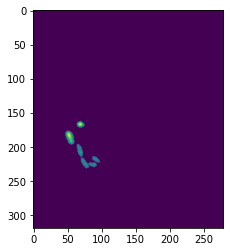

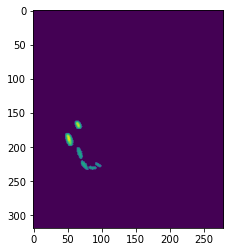

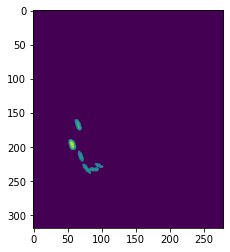

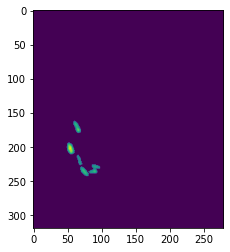

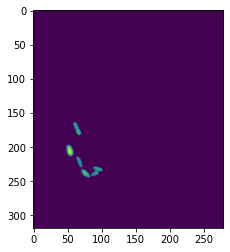

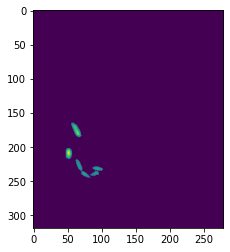

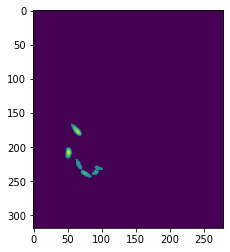

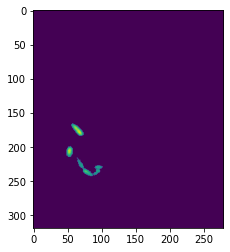

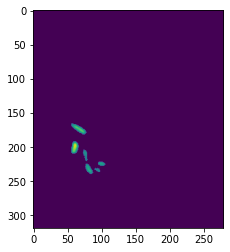

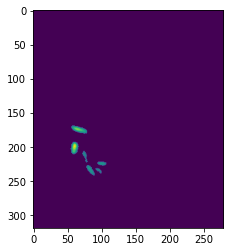

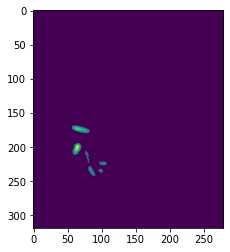

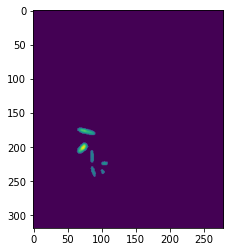

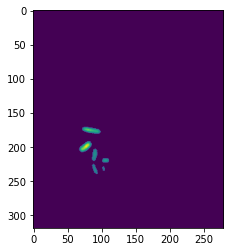

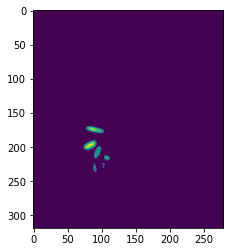

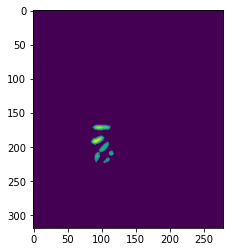

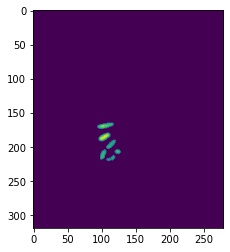

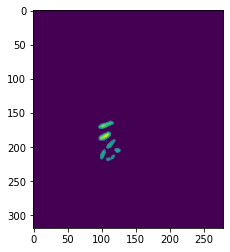

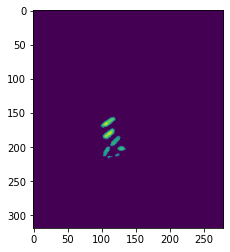

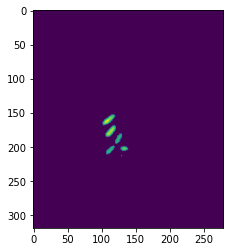

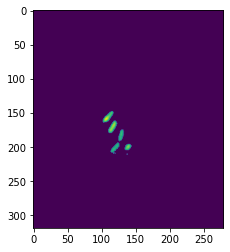

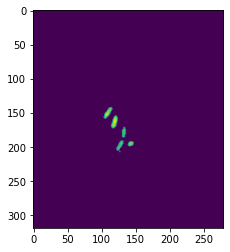

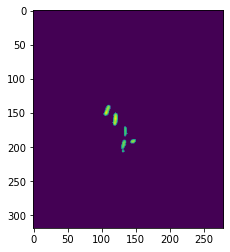

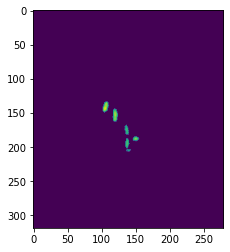

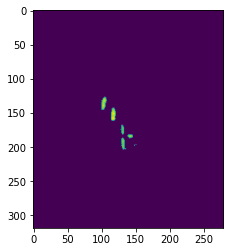

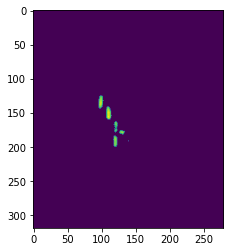

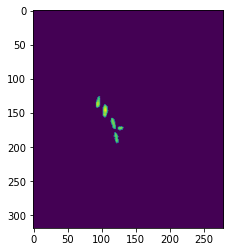

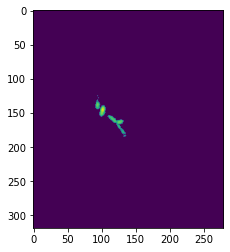

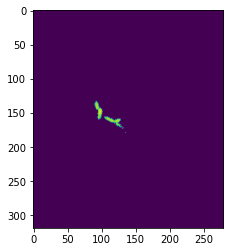

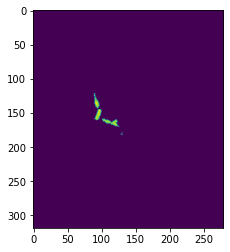

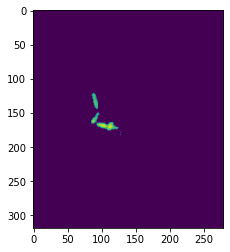

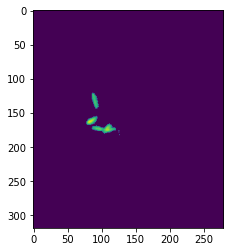

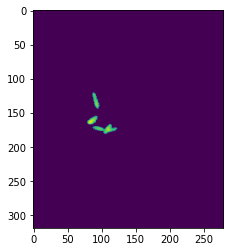

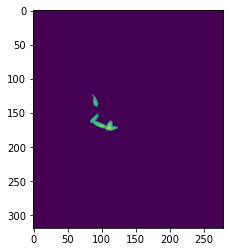

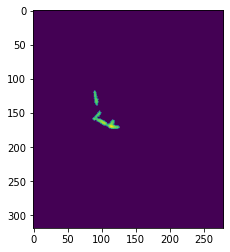

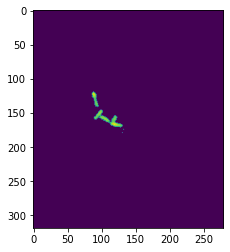

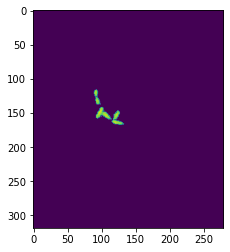

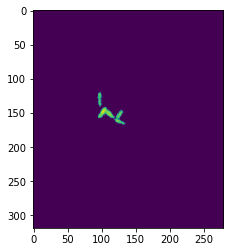

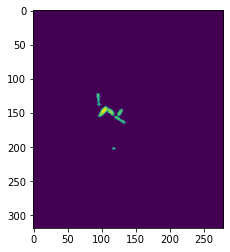

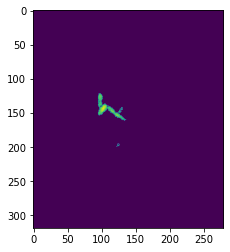

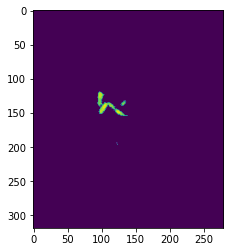

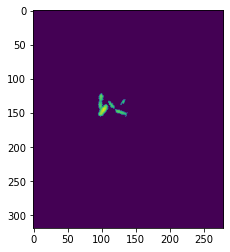

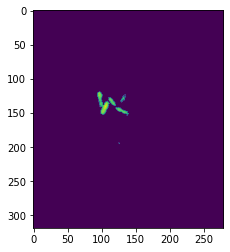

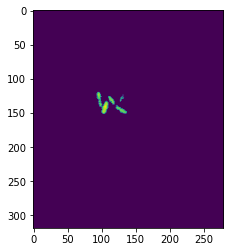

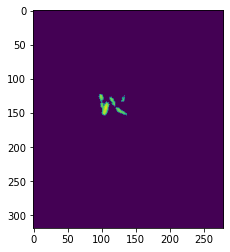

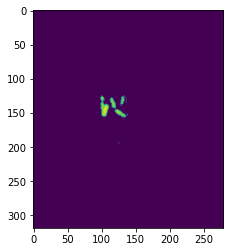

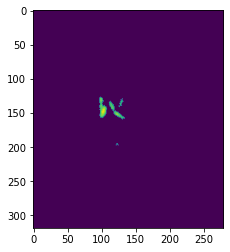

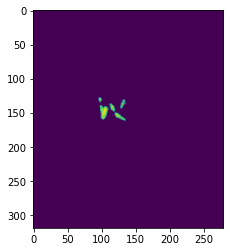

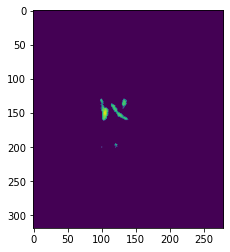

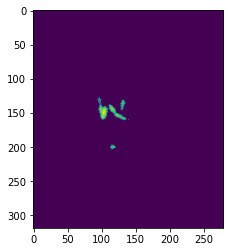

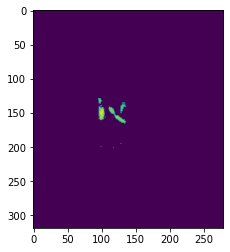

In [8]:
# plot thresholds and profiles
for tind in np.arange(50):
    lb=d.h5f['[D6] threshold lower bound'][tind]
    sp=d.h5f['[D2] threshold saddle point'][tind]
    ub=d.h5f['[D4] threshold upper bound'][tind]

    lbind=np.int(d.h5f['[D7] threshold lower bound index'][tind])
    spind=np.int(d.h5f['[D3] threshold saddle point index'][tind])
    ubind=np.int(d.h5f['[D5] threshold upper bound index'][tind])
    bc=np.asarray(d.h5f['[G01] voxel value bin centers/T'+str(tind)])
    lgind=np.where(bc>=lgs[tind])[0][0]
    lg=bc[lgind]

    hs=np.asarray(d.h5f['[G02] voxel value histogram counts/T'+str(tind)])
    fpath=tlist[tind]
    output_dir='/p/lscratchh/yi10/test'
    k0=io.imread(fpath)
    k=copy.deepcopy(k0)
    k[np.where(k<lg)]=0
    
    # print(bc[lgind])
    plt.figure()
    plt.imshow(np.max(k,axis=0))
    surface_smoothing_steps=10
    output_file = hp3d.surface_morphometrics.extract_surface(lg, fpath=fpath, 
                                                             output_dir=output_dir, 
                                                             kernel_size=3, 
                                                             save_mask=False, 
                                                             surface_smoothing_steps=surface_smoothing_steps,
                                                            largest_connected_component=False,
                                                            output_fname='LegiT'+str(tind).zfill(2)+'.stl')
    output_file = hp3d.surface_morphometrics.extract_surface(sp, fpath=fpath, 
                                                             output_dir=output_dir, 
                                                             kernel_size=3, 
                                                             save_mask=False, 
                                                             surface_smoothing_steps=surface_smoothing_steps,
                                                            largest_connected_component=True,
                                                            output_fname='CellT'+str(tind).zfill(2)+'.stl')
    

In [ ]:
# load all the thresholds


# define all the points for legionella


# extract surface for legionella



# Extract the surface

In [5]:
#some paramaters for surface extraction
output_dir = '/p/lscratchh/yi10/test'
save_mask=True
surface_smoothing_steps = 10

In [26]:
av = []
for t in range(0, len(tlist)):
    if t < 20: #remove this. for some reason other t values don't work
        continue
    fpath = tlist[t]
    k=io.imread(fpath)
    res = hp3d.masscenter.find_threshold_saddle_point(k)
    th = res[0][0]
    output_file = hp3d.surface_morphometrics.extract_surface(th, fpath=fpath, output_dir=output_dir, kernel_size=3, save_mask=True, surface_smoothing_steps=surface_smoothing_steps)
    print("****", output_file)
    av.append(surface_morphometrics.calc_morphometrics(output_file))

EXTRACT SURFACE  Trimmed_cell0_Iter_0_ch0_stack0020_3nm_0618989msec_0004238379msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-08-mCherryRAW264.7-condition1/focused-fast-scans/results_dsk/cell0_Iter_0_deskewed/trimmed_stacks/Trimmed_cell0_Iter_0_ch0_stack0020_3nm_0618989msec_0004238379msecAbs.tif
create binary mask with threshold 330
kernel size for morphological operation is 3
Apply closing operation
Apply opening operation
Apply marching cubes
save binary mask to /p/lustre2/miao1/llsm_output
Get the largest connected component
smooth surface with laplacian filter with 10 steps and relaxation factor 0.1
save surface to /p/lustre2/miao1/llsm_output
**** /p/lustre2/miao1/llsm_output/Trimmed_cell0_Iter_0_ch0_stack0020_3nm_0618989msec_0004238379msecAbs330_10.stl
surface area 62939.38222948389
volume 1278425.4964370239
ratio 0.04923195165060159
EXTRACT SURFACE  Trimmed_cell0_Iter_0_ch0_stack0021_3nm_0649953msec_0004269343msecAbs
input file is /p/lscratchh/yi10/llsm-data/2021-10-08

In [28]:
av = np.array(av)
av.shape
print(av)

(30, 2)

[[  62939.38222948 1278425.49643702]
 [  64481.57936513 1289768.113638  ]
 [  63231.74546415 1249871.54645028]
 [  65167.98761542 1255569.06712538]
 [  63213.70139528 1213117.71568448]
 [  62623.86625239 1253945.87167107]
 [  62563.60750023 1246987.99548526]
 [  63982.74878603 1226288.5812598 ]
 [  66662.50108678 1263067.83917747]
 [  63642.0105534  1257130.63949517]
 [  65491.26031601 1315407.52877088]
 [  65454.58599771 1318463.18243624]
 [  63708.75088305 1269533.89205671]
 [  66811.04190045 1282584.22422777]
 [  65653.16029737 1305422.96923241]
 [  64632.35333632 1279097.16022371]
 [  64848.80899745 1286197.93830484]
 [  63862.07865191 1290711.21760512]
 [  62983.51264213 1221659.21597345]
 [  63356.5429111  1244189.90569512]
 [  65899.00669122 1314418.68706927]
 [  66558.44969698 1320239.94697521]
 [  63448.26086676 1275146.41307943]
 [  63862.02650987 1248710.68057971]
 [  62614.17164843 1212471.54478301]
 [  65818.94938594 1308545.06104341]
 [  66055.07567372 1305112.61020797]
 

In [32]:
surface_areas = av[:, 0]
volumes = av[:, 1]

[1278425.49643702 1289768.113638   1249871.54645028 1255569.06712538
 1213117.71568448 1253945.87167107 1246987.99548526 1226288.5812598
 1263067.83917747 1257130.63949517 1315407.52877088 1318463.18243624
 1269533.89205671 1282584.22422777 1305422.96923241 1279097.16022371
 1286197.93830484 1290711.21760512 1221659.21597345 1244189.90569512
 1314418.68706927 1320239.94697521 1275146.41307943 1248710.68057971
 1212471.54478301 1308545.06104341 1305112.61020797 1278417.76554948
 1297662.91841133 1288340.35777737]


Text(0.5, 0, 'surface area')

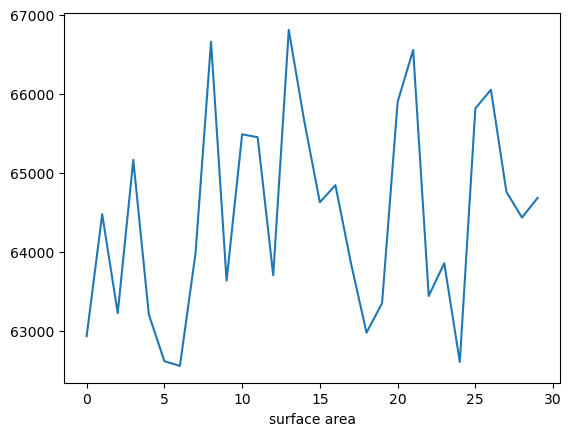

In [36]:
plt.plot(surface_areas)
plt.xlabel("surface area")
plt.show()

Text(0.5, 0, 'volume')

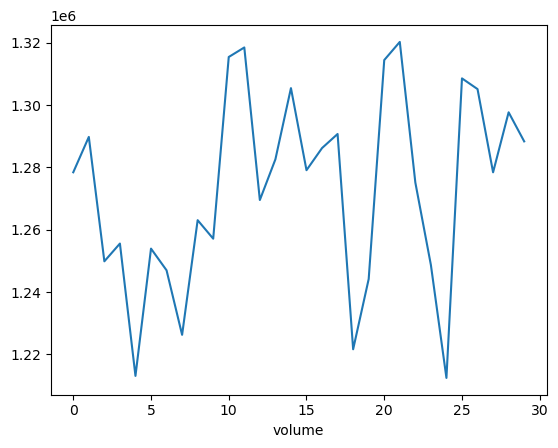

In [37]:
plt.plot(volumes)
plt.xlabel("volume")
plt.show()

Text(0.5, 0, 'ratios')

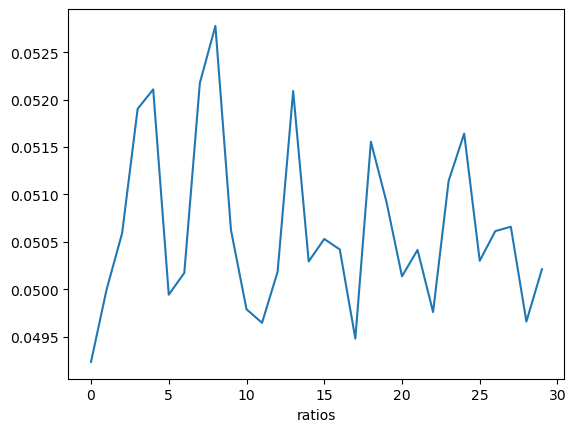

In [40]:
ratios = surface_areas / volumes
plt.plot(ratios)
plt.xlabel("ratios")
plt.show()

Text(0.5, 23.52222222222222, 'volume')

Text(33.722222222222214, 0.5, 'surface area')

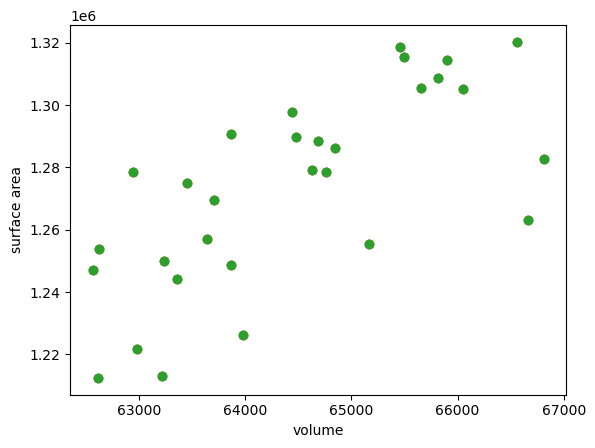

In [43]:
plt.scatter(surface_areas, volumes)
plt.xlabel("volume")
plt.ylabel("surface area")
plt.show()